# The CBS algorithm for MAPF

In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../')
from metrics import flowtime, makespan
                
from MAPF import MultiAgentAStar,find_conflict
%load_ext autoreload
%autoreload 2

%matplotlib inline

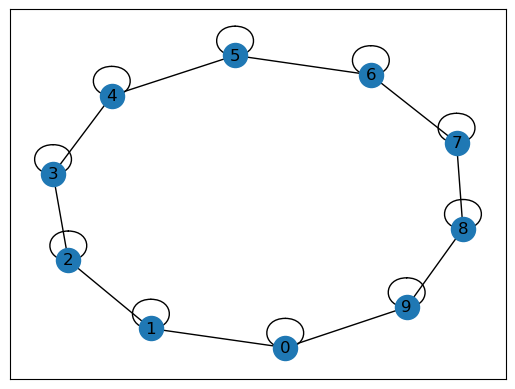

In [2]:
G = nx.circulant_graph(10,offsets = [0,1])
nx.draw_networkx(G)

In [12]:
# Basic components of the MAPF problem

G # The graph

start_nodes = tuple([0,1]) # Must be hashable.

goal_nodes = tuple([3,9]) 

'''
    If the problem is labeled, the goals are pre-assigned to the agents, meaning agent k must go to goal k. 
    Otherwise, the goals are not pre-assigned to the agents, meaning the problem is considered solved if all goals are occupied by the agents.
'''
labeled_goals = True 

sol,ft = MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals)


In [16]:
from queue import PriorityQueue
# f

edge_weights = None
metric = flowtime
if edge_weights is None:
        edge_weights = {e:1 for e in G.edges} # Assume uniform weights if None is given.

nx.set_edge_attributes(G,edge_weights,'weight')

# Initialization. Plan inidivual paths for agent agent without considering conflicts.
# We simply call the standard networkx library for that, computing the all-to-all SP.
p = nx.shortest_path(G,weight = 'weight') # The [weight] argument here should be the key to weight values in the edge data dictionary.
plan0 = [p[s][g] for s, g in zip(start_nodes, goal_nodes)]

OPEN = PriorityQueue()
OPEN.put((metric(G,plan0,goal_nodes),plan0)) 

while not OPEN.empty():
    fscore, plan = OPEN.get()
    # Look for the first conflict.
    conflict = find_conflict(plan)
    if not conflict:
        # return plan, fscore
        break
    else:
        #TBD
        pass
#     for 

[0, 1, (0, 1), 0]


In [ ]:
# The below should results in an infeasible problem, where the goal nodes of agent 0 and 2 block the path of agent 1.


G # The graph

start_nodes = tuple([0,1,2]) # Must be hashable.

goal_nodes = tuple([9,6,3]) 

'''
    If the problem is labeled, the goals are pre-assigned to the agents, meaning agent k must go to goal k. 
    Otherwise, the goals are not pre-assigned to the agents, meaning the problem is considered solved if all goals are occupied by the agents.
'''
labeled_goals = True 

MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals)


In [ ]:
# The below should results in an infeasible problem, where the goal nodes of agent 0 and 2 block the path of agent 1.


G # The graph

start_nodes = tuple([0,1,2]) # Must be hashable.

goal_nodes = tuple([9,6,3]) 

'''
    If the problem is labeled, the goals are pre-assigned to the agents, meaning agent k must go to goal k. 
    Otherwise, the goals are not pre-assigned to the agents, meaning the problem is considered solved if all goals are occupied by the agents.
'''
labeled_goals = False # The problem should become feasible again if we change it to unlabeled.s

MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals)


In [ ]:
n_branch = 10
G = nx.Graph()
G.add_edge(0,0)
for i in range(1,n_branch):
    G.add_edge(i,i)
    G.add_edge(0,i)
nx.draw_networkx(G)

In [6]:
# Basic components of the MAPF problem

G # The graph

start_nodes = tuple([1,2]) # Must be hashable.

goal_nodes = tuple([5,4])


'''
    If the problem is labeled, the goals are pre-assigned to the agents, meaning agent k must go to goal k. 
    Otherwise, the goals are not pre-assigned to the agents, meaning the problem is considered solved if all goals are occupied by the agents.
'''
labeled_goals = True 

MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals)


(array([[1, 0, 9, 8, 7, 6, 5],
        [2, 3, 4, 4, 4, 4, 4]]),
 8)